<a href="https://colab.research.google.com/github/MAZanabria/InteligenciaArtificialZVMA/blob/pacman/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laboratorio 2

Nombre: Zanabria Vega Maria Alejandra

Regresion Logistica

tema: Riesgos de la obesidad

La salida es BMI establecemos un umbral para definir que valores de BMI representan "obesidad" y cuales no. Por ejemplo consideramos que BMI por encima de 30 indica obesidad (1) y cualquier otro valor como no obesidad (0).

Entradas (variables independientes): Son las características que se utilizan para predecir la variable objetivo. En el conjunto de datos, las entradas como Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, Age, FCVC, NCP, CH2O, FAF, y TUE.

Salida (variable dependiente): Es la variable que estamos tratando de predecir. La salida parece ser el BMI (Body Mass Index), que es el índice de masa corporal de una persona.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

Regresion Logistica:
En esta parte del ejercicio, creara un modelo de regresion logistica para predecir si una persona esta en riesgo de obecidad.


In [31]:
import pandas as pd

# Cargar datos desde un archivo Excel
data = pd.read_excel('/content/drive/MyDrive/sis 420/laboratorio 2/dataset/datos.xlsx')

# Convertir el DataFrame de pandas a una matriz NumPy
data_array = data.values

# Separar las características (X) de la variable de destino (y)
X_train, y_train = data_array[:16000, 0:16], data_array[:16000, 16]
X_test, y_test = data_array[4000:, 0:16], data_array[4000:, 16]

# Para imprimir los datos
print("Conjunto de entrenamiento - Características:")
print(X_train)
print("Conjunto de entrenamiento - Etiquetas:")
print(y_train)



Conjunto de entrenamiento - Características:
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 6.66666667e-01
  5.00000000e-01 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 6.66666667e-01
  1.00000000e+00 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 6.66666667e-01
  5.00000000e-01 6.66666667e-01]
 ...
 [1.59970000e+04 0.00000000e+00 0.00000000e+00 ... 6.66666667e-01
  2.86350000e-03 2.74780000e-01]
 [1.59980000e+04 1.00000000e+00 0.00000000e+00 ... 6.66666667e-01
  7.32975000e-02 3.33333333e-01]
 [1.59990000e+04 0.00000000e+00 1.00000000e+00 ... 6.66666667e-01
  7.18048500e-01 4.81460667e-01]]
Conjunto de entrenamiento - Etiquetas:
[0.5       0.        0.5       ... 0.5       0.        0.4632825]


visualizar datos:
Antes de comenzar a implementar cualquier algoritmo de aprendizaje. Mostramos los datos en una grafica bidimencional llamando a la funcion plotData.

In [ ]:
import matplotlib.pyplot as plt

def plotData(X, y):
    # Gráfica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = plt.figure()

    # Encuentra Indices de Ejemplos Positivos y Negativos
    pos = y == 1
    neg = y == 0

    # Grafica Ejemplos
    plt.plot(X[pos, 0], X[pos, 1], 'k*', markersize=10, label='Positivo')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', markersize=8, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='black', label='Negativo')

    # Ajustes de la gráfica
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.title('Gráfica de Datos')

    # Mostrar la gráfica
    plt.show()


se llama a la funcion implementada para mostrar los datos cargados:


In [32]:
import matplotlib.pyplot as plt

def plotData(X, y):
    # Gráfica los puntos de datos X y y
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', label='obesidad')
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', label='No obesidad')

    # Añade etiquetas para los ejes
    plt.xlabel('Gender','family_with_overweigth','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Age','Height','weight','FCV','NPC')
    plt.ylabel('BMI')

    # Añade una leyenda
    plt.legend()

    # Muestra la gráfica
    plt.show()


funcion sigmoidea:

In [34]:
import numpy as np

def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    return 1 / (1 + np.exp(-z))
# Aquí theta se inicializa con valores aleatorios para este ejemplo
theta = np.random.randn(17)

# Generar datos de ejemplo para X
# Aquí simplemente generamos datos aleatorios para X para mostrar el concepto
num_datos = 200000
num_caracteristicas = 17
X = np.random.randn(num_datos, num_caracteristicas)

# Calcula el producto punto entre X y theta
z = np.dot(X, theta)

# Calcula las salidas sigmoides
salida_sigmoid = sigmoid(z)

# Imprime las salidas sigmoides
print(salida_sigmoid)




[1.77910130e-01 4.05431005e-02 7.12369643e-01 ... 4.40923678e-06
 6.01108518e-02 3.11978090e-01]


In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

funcion de costo y gradiente

In [12]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

funcion de costo

In [13]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

desecenso por el gradiente

In [19]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

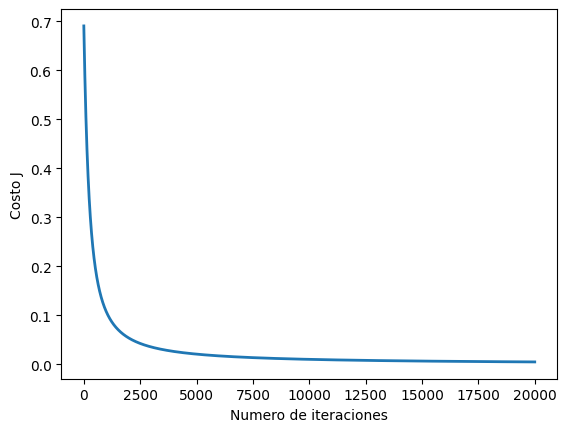

theta calculado por el descenso por el gradiente: [-5.27644900e+00  1.13537611e-02 -8.60665962e-04  3.20017263e-03
  4.37745891e-03 -2.40921268e-03  4.83900325e-03  1.53160413e-02
 -4.32436014e-03  8.01962497e-03  6.10879727e-03 -9.20626148e-03
  1.78019597e-03 -1.57541138e-03 -6.32949599e-03  8.21175134e-03
  3.03157229e-03  7.61576415e-04]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# generar datos de entrenamiento
num_datos = 16000
num_caracteristicas = 17
# Generar valores aleatorios para las características
X = np.random.randn(num_datos, num_caracteristicas)

# Agregar una columna de unos a X para representar el término de intercepción
X = np.concatenate((np.ones((num_datos, 1)), X), axis=1)

# Definir la columna de BMI (índice 16) como binaria basada en la condición de obesidad
BMI = X[:, 16]  # Supongamos que el índice 16 representa la columna de BMI en X
y = (BMI > 30).astype(int)  # Si BMI > 30, asigna 1 (obesidad), de lo contrario, asigna 0 (no obesidad)

# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 20000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(num_caracteristicas + 1)  # Corregir la inicialización de theta
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:', theta)



In [37]:
# Calcular la media y la desviación estándar utilizando los datos de entrenamiento
mu_train = np.mean(X_train, axis=0)
sigma_train = np.std(X_train, axis=0)

# Normalizar los datos de prueba utilizando la media y la desviación estándar de los datos de entrenamiento
X_test_norm = (X_test - mu_train) / sigma_train

#  Agrega una columna de unos al principio de la matriz de características normalizada
m_test, _ = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Calcula la probabilidad de riesgo de obesidad
probabilidad_obesidad = sigmoid(np.dot(X_test_norm, theta))

# Imprime la probabilidad calculada de riesgo de obesidad para los datos de prueba
print(probabilidad_obesidad)


[0.28861892 0.51432465 0.98685208 ... 0.03174872 0.97872774 0.00124734]
